# Neural Network Architectures:
We utilize different neural network models to learn complex patterns from data and solve various tasks.

- **Feedforward Neural Network (FNN)**:  
  is the most basic type of neural network where information flows in one direction—from input to output—without any cycles or feedback. It is effective for simple regression and classification tasks.

- **Recurrent Neural Network (RNN)**:  
  is designed for sequence data, where the output depends on the previous inputs. It uses loops to allow information to persist, making it suitable for time series, text, and sequential data analysis.

- **Convolutional Neural Network (CNN)**:  
  is a specialized network for processing grid-like data, such as images. It uses convolutional layers to automatically learn spatial hierarchies of features, making it highly effective for image recognition and classification.

- **Quantum Neural Network (QNN)**:  
  combines principles from quantum computing with neural networks. It leverages quantum mechanics for more complex data representations and can be beneficial in solving problems with high computational complexity.

## Feedforward Neural Network for Classification (FFNN)

A **Feedforward Neural Network (FFNN)** is a simple neural network where data moves in one direction, from input to output, through hidden layers.

### Problem Description:
We use an FFNN to classify **Iris flowers** based on features:
- Sepal length, Sepal width
- Petal length, Petal width

The task is to predict one of 3 species: Setosa, Versicolor, or Virginica.

### FFNN:
1. **Linear Combination** at each layer:
   $$ z^{(l)} = W^{(l)} x^{(l-1)} + b^{(l)} $$
2. **Activation Function** introduces non-linearity:
   $$ x^{(l)} = f(z^{(l)}) $$
3. **Output Layer** produces class probabilities using softmax:
   $$ y = \text{softmax}(W^{(L)} x^{(L-1)} + b^{(L)}) $$

### Steps:
1. Load and preprocess the Iris dataset.
2. Define the FFNN with hidden layers and activation functions.
3. Train the model using cross-entropy loss and backpropagation.
4. Test the model on the test set and evaluate accuracy.


Epoch [10/100], Loss: 0.7783
Epoch [20/100], Loss: 0.5399
Epoch [30/100], Loss: 0.3921
Epoch [40/100], Loss: 0.2934
Epoch [50/100], Loss: 0.2166
Epoch [60/100], Loss: 0.1639
Epoch [70/100], Loss: 0.1284
Epoch [80/100], Loss: 0.1050
Epoch [90/100], Loss: 0.0902
Epoch [100/100], Loss: 0.0800
Accuracy: 96.67%


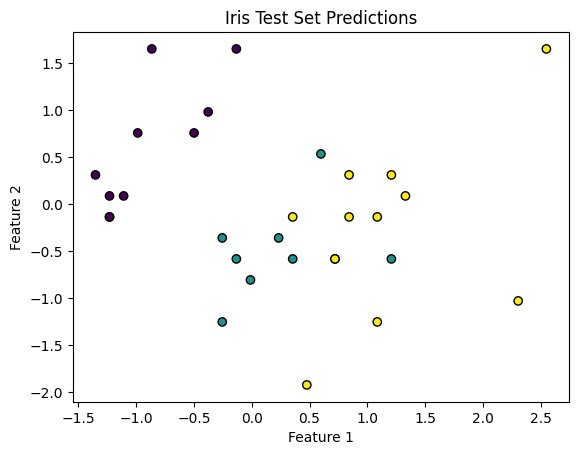

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Define the Feedforward Neural Network architecture
class FeedforwardNN(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        super(FeedforwardNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x

# Function to train the model
def train_model(model: nn.Module,
                X_train: torch.Tensor,
                y_train: torch.Tensor,
                criterion: nn.Module,
                optimizer: optim.Optimizer,
                epochs: int = 100) -> None:

    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()

        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        # Backward pass and optimization
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 10 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Function to test the model
def test_model(model: nn.Module, X_test: torch.Tensor) -> torch.Tensor:
    model.eval()
    with torch.no_grad():
        outputs = model(X_test)
        _, predicted = torch.max(outputs.data, 1)
    return predicted

# Main execution flow
if __name__ == "__main__":
    # Load and prepare the Iris dataset
    iris = load_iris()
    X = iris.data
    y = iris.target

    # Split into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardize the dataset (mean=0, std=1)
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    # Convert to PyTorch tensors
    X_train = torch.tensor(X_train, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.long)
    y_test = torch.tensor(y_test, dtype=torch.long)

    # Define model parameters
    input_size = X_train.shape[1]  # 4 features
    hidden_size = 10
    output_size = len(np.unique(y))  # 3 classes

    # Initialize model, loss function, and optimizer
    model = FeedforwardNN(input_size, hidden_size, output_size)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)

    # Train the model
    train_model(model, X_train, y_train, criterion, optimizer, epochs=100)

    # Test the model
    y_pred = test_model(model, X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'Accuracy: {accuracy * 100:.2f}%')

    # Plotting the results
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='viridis', marker='o', edgecolor='k')
    plt.title('Iris Test Set Predictions')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

## Recurrent Neural Network for Prediction (RNN)

An **RNN** processes sequential data by maintaining a hidden state that captures information from previous time steps. This is ideal for tasks like **time-series forecasting**.

### Problem Description:
We use an RNN to predict future values of a **sine wave** based on past observations.

### RNN:
1. **Hidden State Update** at each time step:
   $$ h_t = f(W_h \, h_{t-1} + W_x \, x_t + b) $$
   where $W_h$, $W_x$ are weight matrices, and $f$ is the activation function (e.g., tanh).
   
2. **Output Calculation**:
   $$ y_t = W_y \, h_t + b_y $$

### Steps:
1. Generate sine wave data.
2. Define the RNN with hidden layers to capture sequential dependencies.
3. Train the RNN to predict future values of the sine wave using Mean Squared Error.
4. Test the model on unseen data and visualize the predictions.


Epoch [100/1000], Loss: 0.0035
Epoch [200/1000], Loss: 0.0018
Epoch [300/1000], Loss: 0.0010
Epoch [400/1000], Loss: 0.0006
Epoch [500/1000], Loss: 0.0004
Epoch [600/1000], Loss: 0.0003
Epoch [700/1000], Loss: 0.0002
Epoch [800/1000], Loss: 0.0002
Epoch [900/1000], Loss: 0.0002
Epoch [1000/1000], Loss: 0.0001


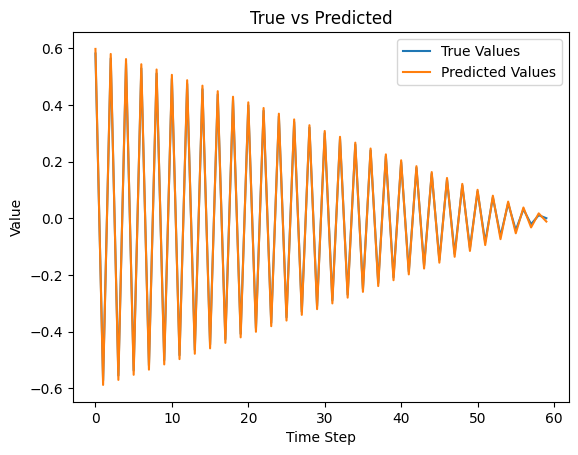

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Generate sine wave data
def generate_sine_wave(seq_length: int, num_samples: int):
    x = np.linspace(0, num_samples * np.pi, num_samples)
    y = np.sin(x)
    return y

# Prepare the dataset: Create sequences with input length = seq_length
def create_dataset(data: np.ndarray, seq_length: int):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        labels.append(data[i + seq_length])

    sequences = torch.tensor(sequences, dtype=torch.float32).unsqueeze(-1)  # Shape: [batch_size, seq_length, 1]
    labels = torch.tensor(labels, dtype=torch.float32).unsqueeze(-1)        # Shape: [batch_size, 1]
    return sequences, labels

# Define the RNN-based Neural Network architecture
class RNNModel(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, output_size: int, num_layers: int = 1):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])  # Use the last output of the sequence
        return out

# Function to train the model
def train_rnn_model(model: nn.Module,
                    X_train: torch.Tensor,
                    y_train: torch.Tensor,
                    criterion: nn.Module,
                    optimizer: optim.Optimizer,
                    epochs: int = 100,
                    device: torch.device = 'cpu') -> None:

    model.to(device)
    X_train, y_train = X_train.to(device), y_train.to(device)

    model.train()
    for epoch in range(epochs):
        optimizer.zero_grad()
        outputs = model(X_train)
        loss = criterion(outputs, y_train)
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Function to test the model
def test_rnn_model(model: nn.Module, X_test: torch.Tensor, device: torch.device = 'cpu') -> torch.Tensor:
    model.to(device)
    X_test = X_test.to(device)

    model.eval()
    with torch.no_grad():
        predictions = model(X_test)
    return predictions.cpu().numpy()

# Plot the true vs predicted values
def plot_predictions(true_values: np.ndarray, predicted_values: np.ndarray, title: str = 'True vs Predicted'):
    plt.plot(true_values, label='True Values')
    plt.plot(predicted_values, label='Predicted Values')
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.title(title)
    plt.legend()
    plt.show()

# Main execution flow
if __name__ == "__main__":
    # Hyperparameters
    seq_length = 50
    num_samples = 300
    hidden_size = 20
    output_size = 1  # Predict one value at a time
    num_layers = 2
    epochs = 1000
    learning_rate = 0.001

    # Generate sine wave data
    sine_wave = generate_sine_wave(seq_length, num_samples)

    # Split the data into training and testing sets
    train_size = int(num_samples * 0.8)
    test_size = num_samples - train_size
    train_data = sine_wave[:train_size]
    test_data = sine_wave[train_size - seq_length:]  # Include some overlap for testing

    # Create datasets for training and testing
    X_train, y_train = create_dataset(train_data, seq_length)
    X_test, y_test = create_dataset(test_data, seq_length)

    # Define device (GPU if available)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Initialize model, loss function, and optimizer
    model = RNNModel(input_size=1, hidden_size=hidden_size, output_size=output_size, num_layers=num_layers)
    criterion = nn.MSELoss()  # Regression task, so use Mean Squared Error
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    train_rnn_model(model, X_train, y_train, criterion, optimizer, epochs, device)

    # Test the model and get predictions
    predictions = test_rnn_model(model, X_test, device)

    # Plot the true vs predicted values for the test set
    plot_predictions(y_test.numpy(), predictions)

## Convolutional Neural Network for Image Classification (CNN)

A **Convolutional Neural Network (CNN)** is designed to process grid-like data, such as images, by applying convolutional filters to capture local patterns and features. CNNs are particularly useful for tasks such as **image classification**, **object detection**, and **image segmentation**.

### Problem Description:
We use a CNN to classify images from a dataset (e.g., MNIST, CIFAR-10). The goal is to predict the correct label (category) for each image based on learned spatial features.

### CNN:
1. **Convolution Operation**:
   $$ (f * g)(i, j) = \sum_m \sum_n f(m, n) \, g(i - m, j - n) $$
   where:
   - \( f \) is the input image
   - \( g \) is the convolution kernel (filter)

2. **Pooling Operation**:
   Pooling reduces the spatial dimensions of the feature maps. For max pooling:
   $$ p(i, j) = \text{max}(x_{i:a, j:b}) $$
   where \( a, b \) define the pooling window.

3. **Fully Connected Layer**:
   The output from the convolutional and pooling layers is flattened and passed through a fully connected layer:
   $$ y = W x + b $$
   where \( W \) and \( b \) are the weights and biases of the fully connected layer.

### Steps:
1. Load and preprocess image data (e.g., MNIST, CIFAR-10).
2. Define a CNN with convolutional, pooling, and fully connected layers.
3. Train the network using cross-entropy loss for classification.
4. Test the model on unseen images and evaluate accuracy.


Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 9912422/9912422 [00:00<00:00, 15952029.72it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 28881/28881 [00:00<00:00, 489607.27it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 1648877/1648877 [00:00<00:00, 4462945.16it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
<urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: certificate has expired (_ssl.c:1007)>



100%|██████████| 4542/4542 [00:00<00:00, 6820812.31it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

Epoch [1/5], Loss: 0.2032
Epoch [2/5], Loss: 0.0536
Epoch [3/5], Loss: 0.0382
Epoch [4/5], Loss: 0.0272
Epoch [5/5], Loss: 0.0227
Accuracy: 98.39%


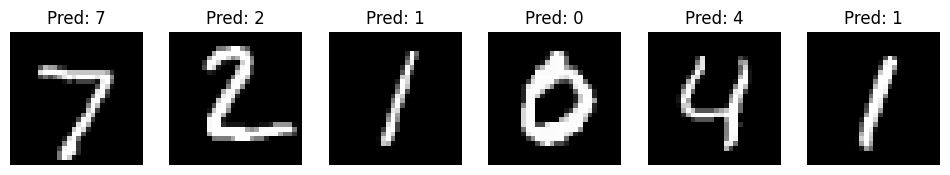

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Define the CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional layer 1: 1 input channel (grayscale), 16 output channels, 3x3 kernel
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, padding=1)
        # Convolutional layer 2: 16 input channels, 32 output channels, 3x3 kernel
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, padding=1)
        # Fully connected layer 1
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        # Fully connected layer 2 (output layer)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        # Apply first convolution, followed by ReLU and max pooling
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2)
        # Apply second convolution, followed by ReLU and max pooling
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2)
        # Flatten the tensor for the fully connected layers
        x = x.view(-1, 32 * 7 * 7)
        # Apply first fully connected layer with ReLU
        x = F.relu(self.fc1(x))
        # Output layer (no activation here since we use CrossEntropyLoss later)
        x = self.fc2(x)
        return x

# Function to train the model
def train_model(model, train_loader, criterion, optimizer, epochs=10, device='cpu'):
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for images, labels in train_loader:
            images, labels = images.to(device), labels.to(device)

            # Zero the gradients
            optimizer.zero_grad()

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {running_loss / len(train_loader):.4f}')

# Function to test the model
def test_model(model, test_loader, device='cpu'):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy: {100 * correct / total:.2f}%')

# Main execution
if __name__ == "__main__":
    # Device configuration (use GPU if available)
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Transformations: convert images to tensors and normalize
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])

    # Load the MNIST dataset
    train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
    test_dataset = datasets.MNIST(root='./data', train=False, transform=transform)

    # Data loaders
    train_loader = DataLoader(dataset=train_dataset, batch_size=64, shuffle=True)
    test_loader = DataLoader(dataset=test_dataset, batch_size=64, shuffle=False)

    # Initialize the CNN model
    model = CNN().to(device)

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Train the model
    train_model(model, train_loader, criterion, optimizer, epochs=5, device=device)

    # Test the model
    test_model(model, test_loader, device=device)

    # Visualize some test results
    model.eval()
    images, labels = next(iter(test_loader))
    images, labels = images.to(device), labels.to(device)
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

    # Show a few test images and their predicted labels
    images = images.cpu()
    fig, axes = plt.subplots(1, 6, figsize=(12, 3))
    for i in range(6):
        axes[i].imshow(images[i].squeeze(), cmap='gray')
        axes[i].set_title(f'Pred: {predicted[i].item()}')
        axes[i].axis('off')
    plt.show()

## Quantum Neural Network (QNN)

A **Quantum Neural Network (QNN)** combines concepts from quantum computing and classical neural networks. Quantum neural networks leverage quantum bits (qubits) and quantum gates to perform operations, which may offer computational advantages in certain tasks like optimization, classification, or quantum data processing.

### Problem Description:
A QNN is designed to solve problems where quantum data or quantum properties (like entanglement or superposition) can provide computational benefits. We aim to use a QNN to classify data by using a quantum circuit as part of the model.

### QNN Architecture:
1. **Quantum Circuit**:
   - The core of a QNN involves a parameterized quantum circuit (PQC) consisting of qubits and quantum gates (e.g., Hadamard, Pauli-X, rotation gates).
   - The gates' parameters are adjusted during training, similar to how weights are adjusted in classical neural networks.

2. **Hybrid Classical-Quantum Model**:
   - A QNN is often **hybrid**, meaning it combines classical neural network layers and quantum layers. The classical layers handle preprocessing or postprocessing, while the quantum layers perform the core computations.
   
3. **Quantum Gates and Qubits**:
   - Quantum gates act on qubits, manipulating their states in superposition. Common gates used in QNNs include:
     - **Hadamard Gate**: Creates superposition.
     - **Pauli-X Gate**: Quantum NOT gate (flip).
     - **Rotation Gates (Rz, Rx, Ry)**: Parameterized gates that rotate qubits by some angle.

4. **Training**:
   - The QNN is trained using techniques such as **variational quantum algorithms** where a classical optimizer (e.g., gradient descent) tunes the parameters of the quantum gates to minimize a loss function.

### Steps:
1. Encode classical data (features) into quantum states using a quantum circuit.
2. Construct the quantum circuit with parameterized gates and apply measurements.
3. Combine quantum operations with classical layers for postprocessing.
4. Train the model by adjusting quantum gate parameters to minimize the loss.
5. Use the trained QNN to classify data or make predictions.


In [ ]:
!pip install pennylane --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 31.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.0/930.0 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.8 MB/s eta 0:00:00


Epoch [5/200], Loss: 0.6871
Epoch [10/200], Loss: 0.6708
Epoch [15/200], Loss: 0.6647
Epoch [20/200], Loss: 0.6631
Epoch [25/200], Loss: 0.6611
Epoch [30/200], Loss: 0.6578
Epoch [35/200], Loss: 0.6544
Epoch [40/200], Loss: 0.6514
Epoch [45/200], Loss: 0.6490
Epoch [50/200], Loss: 0.6466
Epoch [55/200], Loss: 0.6442
Epoch [60/200], Loss: 0.6419
Epoch [65/200], Loss: 0.6397
Epoch [70/200], Loss: 0.6376
Epoch [75/200], Loss: 0.6355
Epoch [80/200], Loss: 0.6334
Epoch [85/200], Loss: 0.6313
Epoch [90/200], Loss: 0.6293
Epoch [95/200], Loss: 0.6272
Epoch [100/200], Loss: 0.6252
Epoch [105/200], Loss: 0.6232
Epoch [110/200], Loss: 0.6212
Epoch [115/200], Loss: 0.6193
Epoch [120/200], Loss: 0.6173
Epoch [125/200], Loss: 0.6153
Epoch [130/200], Loss: 0.6134
Epoch [135/200], Loss: 0.6115
Epoch [140/200], Loss: 0.6096
Epoch [145/200], Loss: 0.6077
Epoch [150/200], Loss: 0.6059
Epoch [155/200], Loss: 0.6040
Epoch [160/200], Loss: 0.6022
Epoch [165/200], Loss: 0.6004
Epoch [170/200], Loss: 0.5986


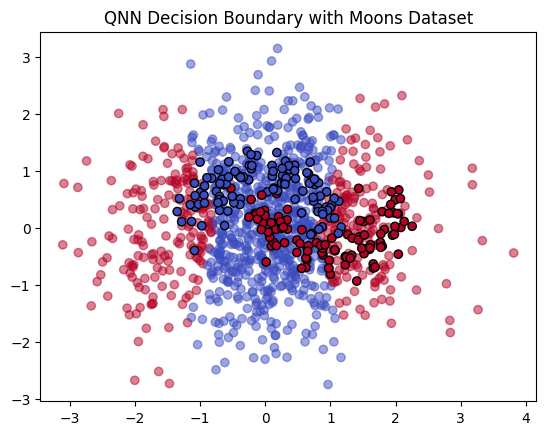

In [ ]:
import pennylane as qml
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Define a quantum device with 2 qubits
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits)

# Quantum circuit (Ansatz)
@qml.qnode(dev, interface='torch')
def quantum_circuit(inputs, weights):
    # Encoding classical inputs into quantum states
    qml.templates.AngleEmbedding(inputs, wires=range(n_qubits))

    # Quantum layer: Apply a variational layer of rotations and entanglement
    qml.templates.BasicEntanglerLayers(weights, wires=range(n_qubits))

    # Measurement
    return [qml.expval(qml.PauliZ(i)) for i in range(n_qubits)]

# Define the hybrid quantum-classical layer
class QuantumLayer(nn.Module):
    def __init__(self, n_qubits, n_layers):
        super(QuantumLayer, self).__init__()
        # Randomly initialize weights for the quantum layer
        self.weight = nn.Parameter(0.01 * torch.randn(n_layers, n_qubits))

    def forward(self, x):
        # Apply the quantum circuit for each input and convert the output to float32 tensors
        results = [torch.tensor(quantum_circuit(x[i], self.weight), dtype=torch.float32) for i in range(len(x))]
        return torch.stack(results)

# Classical Neural Network with a quantum layer
class HybridQNN(nn.Module):
    def __init__(self):
        super(HybridQNN, self).__init__()
        # Quantum layer with 2 qubits and 1 layer
        self.quantum_layer = QuantumLayer(n_qubits=2, n_layers=1)
        # Classical fully connected layer
        self.fc = nn.Linear(2, 2)

    def forward(self, x):
        # Pass through the quantum layer
        x = self.quantum_layer(x)
        # Pass through a classical fully connected layer
        x = self.fc(x)
        return x

# Training function
def train_qnn(model, optimizer, criterion, X_train, y_train, epochs=10):
    for epoch in range(epochs):
        model.train()
        optimizer.zero_grad()

        # Forward pass
        outputs = model(X_train)
        loss = criterion(outputs, y_train)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        if (epoch + 1) % 5 == 0:
            print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Create a more interesting dataset using the Moons dataset
def generate_moons_data():
    X, y = make_moons(n_samples=200, noise=0.2, random_state=0)
    return torch.tensor(X, dtype=torch.float32), torch.tensor(y, dtype=torch.long)

# Main execution
if __name__ == "__main__":
    # Generate data
    X_train, y_train = generate_moons_data()

    # Initialize the hybrid QNN model
    model = HybridQNN()

    # Loss and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    # Train the model
    train_qnn(model, optimizer, criterion, X_train, y_train, epochs=200)

    # Visualize decision boundary
    model.eval()
    with torch.no_grad():
        # Generate test data for visualization
        X_test = torch.tensor(np.random.randn(1000, 2), dtype=torch.float32)
        y_test = model(X_test).argmax(dim=1)

    # Plot decision boundary with original data points for reference
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', alpha=0.5)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolor='k')
    plt.title("QNN Decision Boundary with Moons Dataset")
    plt.show()